<a href="https://colab.research.google.com/github/SANGRAMLEMBE/MTech/blob/main/Machine_Learning_Algorithm/Practical/Naive_bayes_ml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Necessary Libraries



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load and Preprocess the Data


In [6]:
# Load the dataset
df = pd.read_csv('/content/rainy_weather.csv')



In [7]:
# Convert "Date" to detetime and extract features

df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis = 1 , inplace = True)

In [8]:
# Encode categorical Features

catgorical_cols = ['Location', 'RainToday','RainTomorrow']

for col in catgorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

## Step 3: Prepare Features and Target Variable

In [9]:
# Separate Feature and Target Variable
x = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

## Step 4: Scale the Features

In [10]:
# scale the Features

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

## Step 5: Split the Data into Training and Testing Sets

In [11]:
x_train , x_test ,y_train , y_test  = train_test_split(x_scaled, y, test_size = 0.2, random_state = (42))

## step 6 : Train the Naive Bayes Model

In [12]:
# Initialize and train the Gaussian Naive Bayes Model
model = GaussianNB()
model.fit(x_train , y_train)

GaussianNB()

## step 7 : Evaluate the Model

In [13]:
# Make Prediction on the test data
y_pred = model.predict(x_test)

In [14]:
# Calculate and print the accuracy
accuracy  = accuracy_score(y_test , y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.73


In [17]:
df.shape

(1000, 16)

In [16]:
# Print the classification report
print("\n Classification report")
print(classification_report(y_test , y_pred))


 Classification report
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       103
           1       0.76      0.65      0.70        97

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



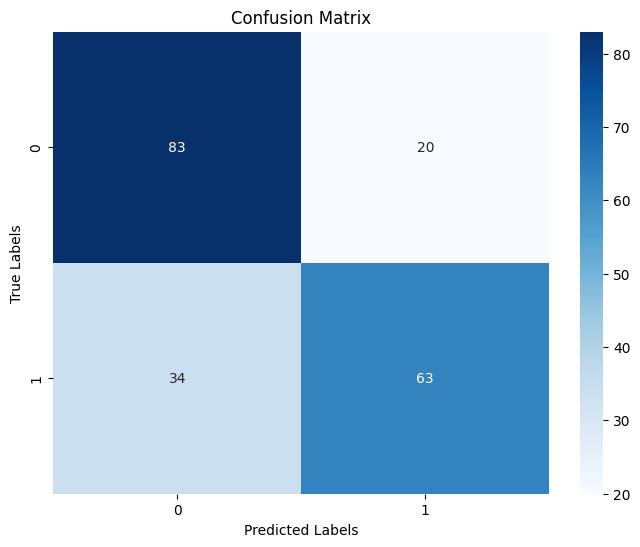

In [21]:
# Genrate and Visualize the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize= (8,6))
sns.heatmap(cm, annot = True , fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()